In [1]:
#612：確率的勾配法下法(stochastic gradient descent

#W ← W -η∂L/∂W

#更新する重みパラメータをW,Wに関する損失関数の勾配を∂L/∂Wとします。
#←はupdate
#η：学習係数
#確率的勾配下法は勾配方向へある一定の距離だけ進むという方法

class SGD:
    def __Init__(self,lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.key():
            params[key] -= self.lr = grads[key]

SyntaxError: invalid syntax (<ipython-input-1-5645140e1c25>, line 16)

In [2]:
class SGD:
    def __Init__(self,lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.key():
            params[key] -= self.lr * grads[key]

In [3]:
#lr：learning rate（学習係数) インスタンス数変数として保持
#update(params, grads)は、これまでのニューラルネットワークの実装と同じディクショナリ変数（辞書型のことみたい）
#params['W1'],grads['W1']等のように、それぞれに重みぱらめーたと勾配が格納されている

network = TwoLayerNet(…)
optimizer = SGD()

for i in range(10000):
    …
    x.batch, t_batch = get_mini_batch(…)　#mini_batch
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    …

#optimizerにぱらめーたと勾配の情報を渡す事だけです
#最適化を行うクラスを分離して実装する事で、機能のモジュール化が容易になる
#この後すぐにMomentumという別の最適化手法を実装する。
#そのMomentumも同じくupdate(params, grads)という一文を、0ptimizer = Momentum()に変更するだけで
#切り替える事が出来る

SyntaxError: invalid character in identifier (<ipython-input-3-7b8957a95ddb>, line 5)

In [5]:
#SGD欠点

#f(x,y) = 1/20x^2 + y^2

import numpy as np
import matplotlib.pylab as plt

x = np.arrange(0.0, 20.0, 0.1)
y = function_2(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

def function_2(x):
    return x[0] ** 2 + x[1] ** 2


AttributeError: module 'numpy' has no attribute 'arrange'

ValueError: x and y must have same first dimension, but have shapes (200,) and (1,)

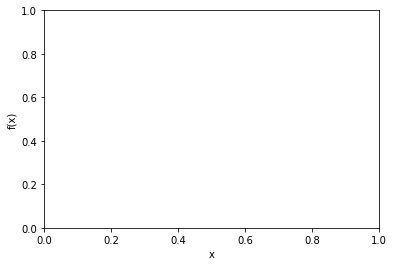

In [6]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_2(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

def function_2(x):
    return x[0] ** 2 + x[1] ** 2

In [7]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

def function_2(x):
    return x[0] ** 2 + x[1] ** 2

NameError: name 'function_1' is not defined

No handles with labels found to put in legend.


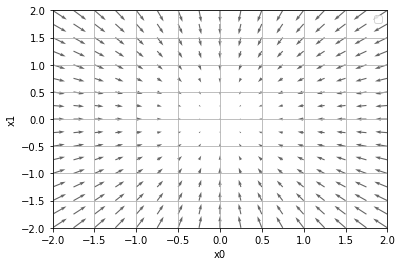

In [8]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]))
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()


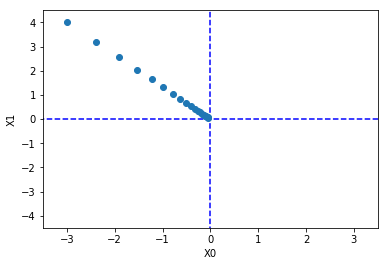

In [9]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


0.1999999999990898


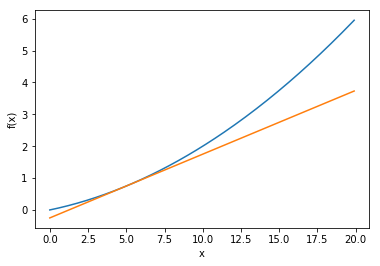

In [10]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


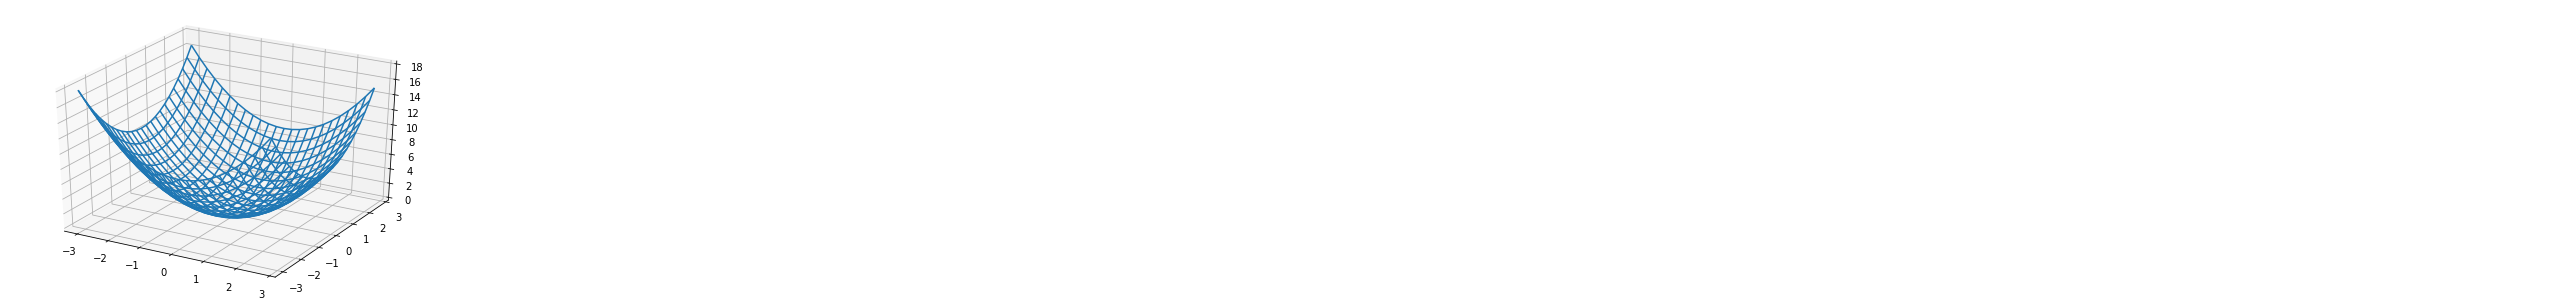

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def func(x0, x1):
    return x0**2 + x1**2

x0 = np.arange(-3, 3, 0.25)
x1 = np.arange(-3, 3, 0.25)
X0, X1 = np.meshgrid(x0, x1)
Y = func(X0, X1)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X0,X1,Y)
plt.show()

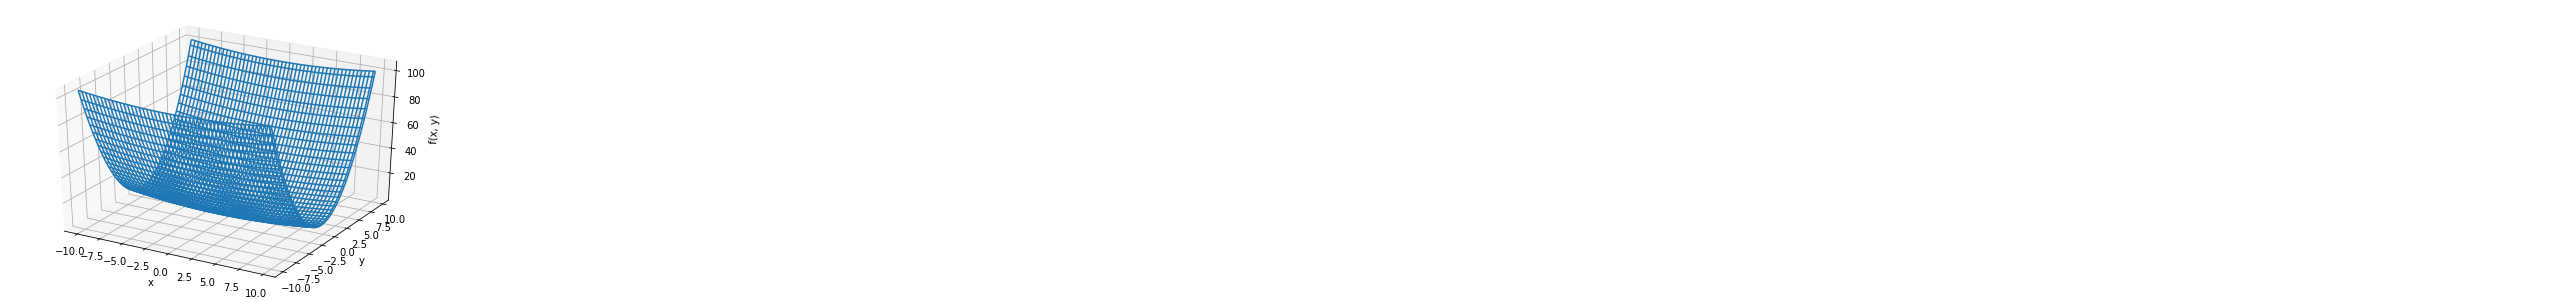

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def func1(x, y):
    return (1/20*x**2) + (y**2)

x = np.arange(-10, 10, 0.2)
y = np.arange(-10, 10, 0.2)

X, Y = np.meshgrid(x, y)
Z = func1(X, Y)

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

ax.plot_wireframe(X, Y, Z)
plt.show()

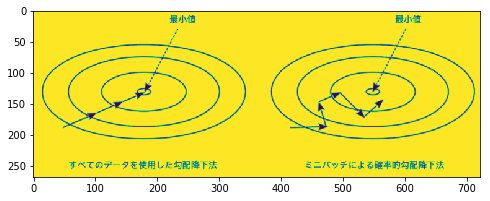

In [13]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/learningtechnch001.png')
plt.figure(figsize=(8, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()